In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats

In [2]:
telecom = pd.read_csv('/home/jeremy/Documents/Prompt bi/promptbi_challenges/datasets/Telecom_Customer_Churn/Telecom+Customer+Churn/telecom_customer_churn.csv')
zipcode = pd.read_csv('/home/jeremy/Documents/Prompt bi/promptbi_challenges/datasets/Telecom_Customer_Churn/Telecom+Customer+Churn/telecom_zipcode_population.csv')

In [3]:
telecom.head(5)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [4]:
zipcode.head()

,Zip Code,Population
0,90001,54492
1,90002,44586
2,90003,58198
3,90004,67852
4,90005,43019


In [5]:
print(telecom.columns)
print(zipcode.columns)

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')
Index(['Zip Code', 'Population'], dtype='object')


In [6]:
telecom.isna().any()

Customer ID                          False
Gender                               False
Age                                  False
Married                              False
Number of Dependents                 False
City                                 False
Zip Code                             False
Latitude                             False
Longitude                            False
Number of Referrals                  False
Tenure in Months                     False
Offer                                 True
Phone Service                        False
Avg Monthly Long Distance Charges     True
Multiple Lines                        True
Internet Service                     False
Internet Type                         True
Avg Monthly GB Download               True
Online Security                       True
Online Backup                         True
Device Protection Plan                True
Premium Tech Support                  True
Streaming TV                          True
Streaming M

In [7]:
telecom.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [8]:
(telecom.isna().sum() / len(telecom)) * 100

Customer ID                           0.000000
Gender                                0.000000
Age                                   0.000000
Married                               0.000000
Number of Dependents                  0.000000
City                                  0.000000
Zip Code                              0.000000
Latitude                              0.000000
Longitude                             0.000000
Number of Referrals                   0.000000
Tenure in Months                      0.000000
Offer                                55.047565
Phone Service                         0.000000
Avg Monthly Long Distance Charges     9.683374
Multiple Lines                        9.683374
Internet Service                      0.000000
Internet Type                        21.666903
Avg Monthly GB Download              21.666903
Online Security                      21.666903
Online Backup                        21.666903
Device Protection Plan               21.666903
Premium Tech 

In [9]:
missing = telecom.isna().sum().reset_index()
missing.columns = ['column', 'missing_count']
missing['missing_percent'] = (missing['missing_count'] / len(telecom)) * 100
missing

,column,missing_count,missing_percent
0,Customer ID,0,0.000000
1,Gender,0,0.000000
2,Age,0,0.000000
3,Married,0,0.000000
4,Number of Dependents,0,0.000000
5,City,0,0.000000
6,Zip Code,0,0.000000
7,Latitude,0,0.000000
8,Longitude,0,0.000000
9,Number of Referrals,0,0.000000


<Axes: >

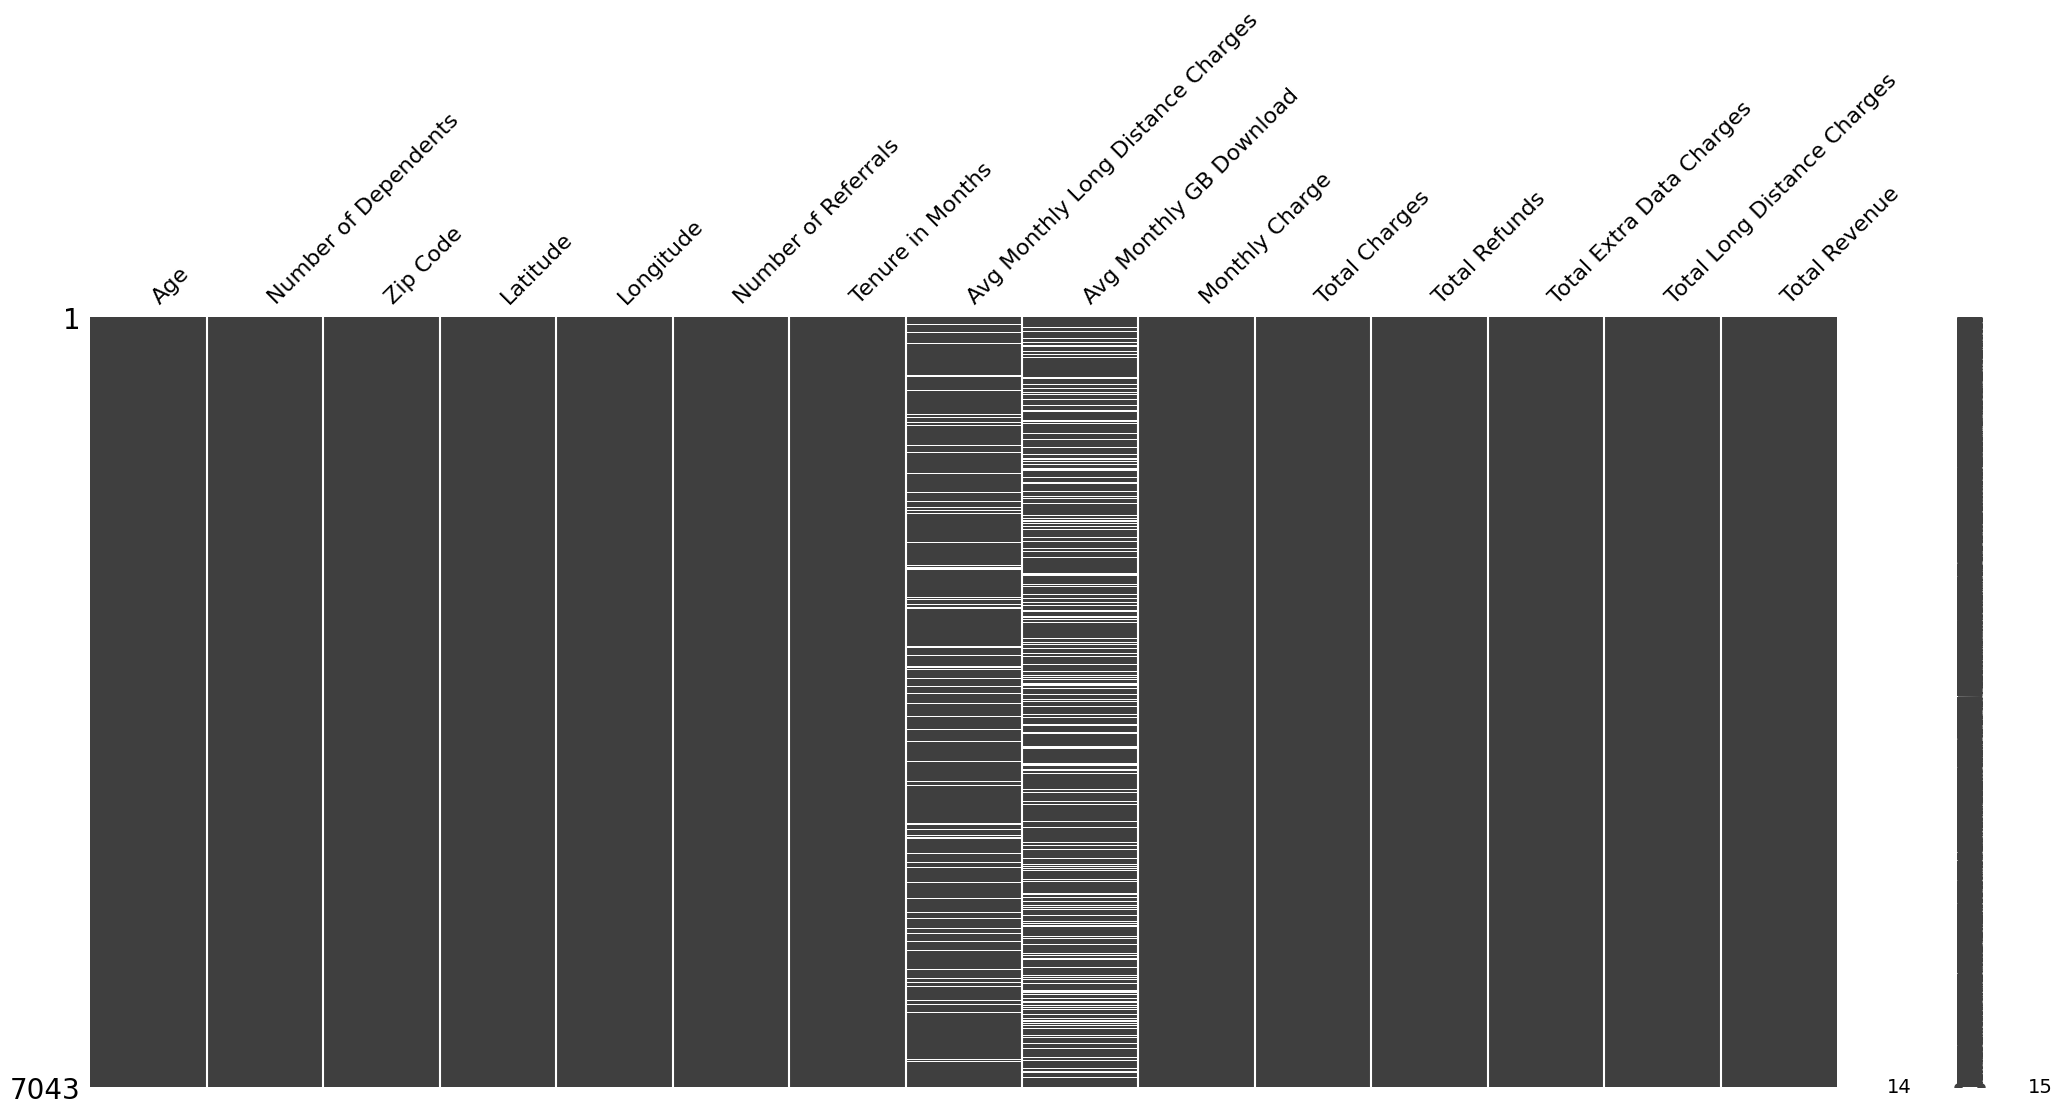

In [10]:
numerical_cols = telecom.select_dtypes(include=['int', 'float']).columns
categorical_cols = telecom.select_dtypes(include=['object']).columns

msno.matrix(telecom[numerical_cols])

In [11]:
# Fill numerical columns with mean
for col in numerical_cols:
    if col in telecom.columns:
        telecom.loc[:, col] = telecom[col].fillna(telecom[col].mean())

# Fill categorical columns with mode
for col in categorical_cols:
    if col in telecom.columns:
        telecom.loc[:, col] = telecom[col].fillna(telecom[col].mode()[0])

In [12]:
telecom.isna().sum()

Customer ID                          0
Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data           

In [ ]:
# Fill numerical columns with mean
for col in numerical_cols:
    if col in telecom.columns:
        telecom[col] = telecom[col].fillna(telecom[col].mean())

# Fill categorical columns with mode
for col in categorical_cols:
    if col in telecom.columns:
        telecom[col] = telecom[col].fillna(telecom[col].mode()[0])

# Check missing values
telecom.isna().sum()

In [ ]:
# numerical
telecom[numerical_cols] = telecom[numerical_cols].apply(lambda x: x.fillna(x.mean()))

# categorical
telecom[categorical_cols] = telecom[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [ ]:
# Fill numerical columns with their mean
for col in numerical_cols:
    telecom.loc[:, col] = telecom[col].fillna(telecom[col].mean())

# Fill categorical columns with their mode
for col in categorical_cols:
    telecom.loc[:, col] = telecom[col].fillna(telecom[col].mode()[0])

In [13]:
numerical_cols = telecom.select_dtypes(include=['int', 'float']).columns
categorical_cols = telecom.select_dtypes(include=['object']).columns

print(numerical_cols)
print(categorical_cols)

Index(['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude',
       'Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')
Index(['Customer ID', 'Gender', 'Married', 'City', 'Offer', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')


In [14]:
cors = telecom[numerical_cols].corr(method='pearson')
cors

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
Age,1.000000,-0.119000,-0.008183,-0.010305,0.007612,-0.025141,0.009927,-0.019000,-0.516637,0.134511,0.059684,0.024168,0.025036,0.003065,0.048265
Number of Dependents,-0.119000,1.000000,0.016493,0.029081,-0.024271,0.278003,0.108237,-0.002730,0.248410,-0.125649,0.022535,0.014023,-0.014436,0.068966,0.038038
Zip Code,-0.008183,0.016493,1.000000,0.894769,-0.790564,0.001463,0.007146,0.011666,-0.002525,-0.002517,0.001978,-0.003797,-0.014550,0.005063,0.002944
Latitude,-0.010305,0.029081,0.894769,1.000000,-0.885979,0.018715,0.011963,0.013701,-0.011995,-0.021613,-0.002784,-0.009901,-0.013233,0.008029,0.000082
Longitude,0.007612,-0.024271,-0.790564,-0.885979,1.000000,-0.009893,-0.009672,-0.014641,0.013455,0.021052,0.003811,-0.000597,0.010461,-0.006923,0.001062
Number of Referrals,-0.025141,0.278003,0.001463,0.018715,-0.009893,1.000000,0.326975,0.001712,0.069704,0.026301,0.250378,0.024756,0.000350,0.216190,0.261853
Tenure in Months,0.009927,0.108237,0.007146,0.011963,-0.009672,0.326975,1.000000,0.012100,0.033841,0.239065,0.826074,0.059021,0.082266,0.674149,0.853146
Avg Monthly Long Distance Charges,-0.019000,-0.002730,0.011666,0.013701,-0.014641,0.001712,0.012100,1.000000,0.015527,0.018455,0.016546,-0.024869,0.019822,0.525222,0.168531
Avg Monthly GB Download,-0.516637,0.248410,-0.002525,-0.011995,0.013455,0.069704,0.033841,0.015527,1.000000,-0.011866,0.029397,-0.009947,0.015291,0.021568,0.029786
Monthly Charge,0.134511,-0.125649,-0.002517,-0.021613,0.021052,0.026301,0.239065,0.018455,-0.011866,1.000000,0.622810,0.023963,0.121238,0.235685,0.563249


In [15]:
telecom.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,13.495231,17.334960,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,14.455000,15.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.420517,26.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,36.395000,27.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [16]:
print(telecom.info())
print(zipcode.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

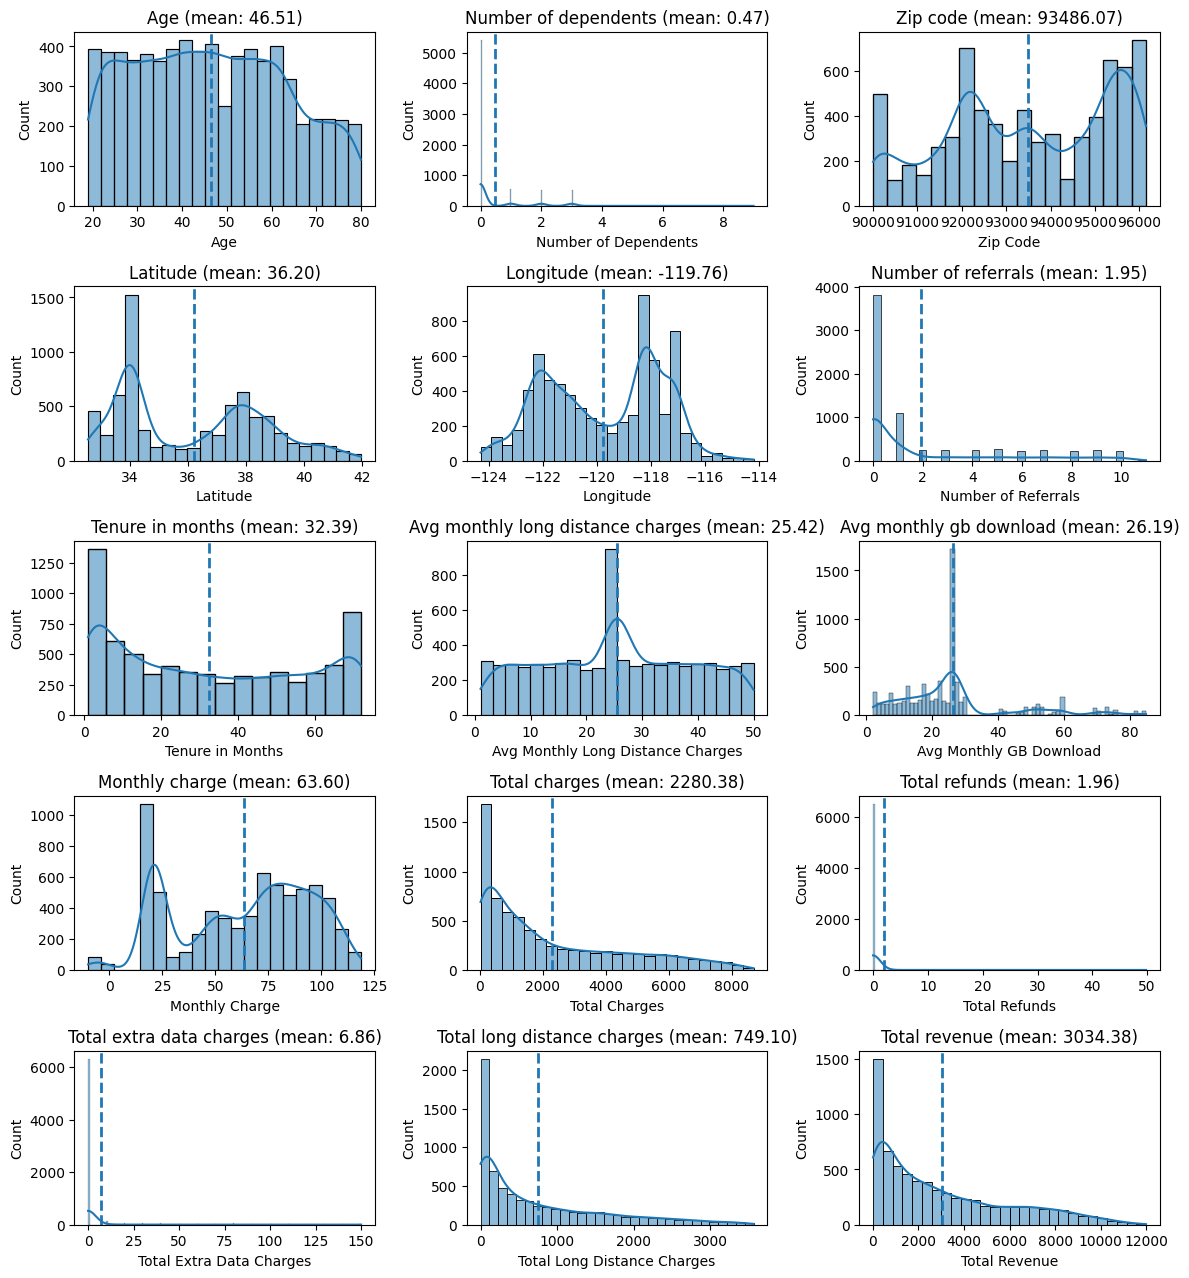

In [17]:
plt.figure(figsize=(12, 15))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
    sns.histplot(telecom[col], kde=True)
    mean_val = telecom[col].mean()
    plt.axvline(mean_val, linestyle='--', linewidth=2)
    plt.title(f"{col.capitalize()} (mean: {mean_val:.2f})")
    
plt.tight_layout()
plt.show()

In [18]:
telecom['Churn Category'].value_counts()

Churn Category
Competitor         6015
Dissatisfaction     321
Attitude            314
Price               211
Other               182
Name: count, dtype: int64

In [19]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

<Figure size 1000x1200 with 0 Axes>

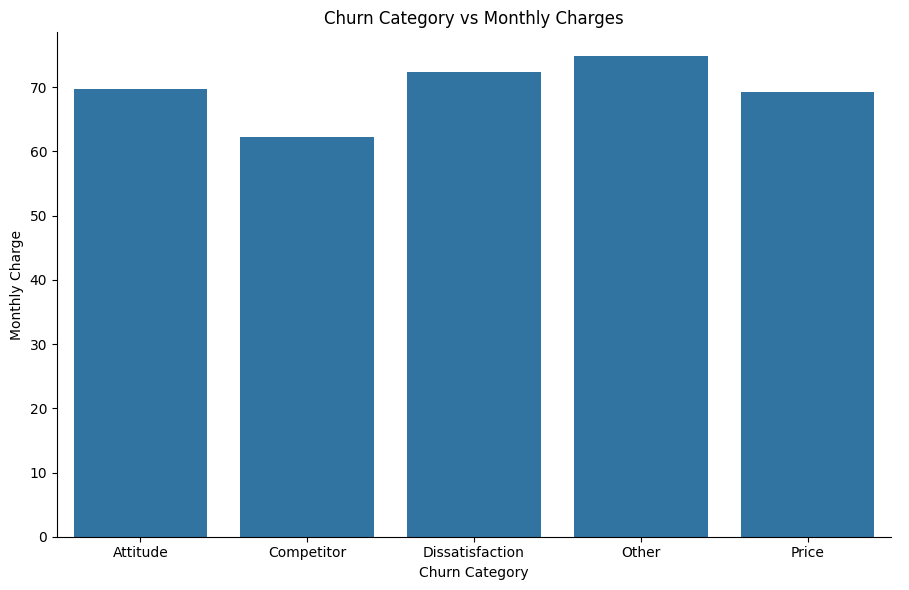

In [21]:
grouped = telecom.groupby('Churn Category')['Monthly Charge'].mean().reset_index()

plt.figure(figsize=(10, 12))
sns.catplot(
    data=grouped,
    x='Churn Category',
    y='Monthly Charge',
    kind='bar',
    height=6,
    aspect=1.5
)
plt.title("Churn Category vs Monthly Charges")
plt.ylabel('Monthly Charge')
plt.xlabel('Churn Category')
plt.tight_layout()
plt.show()


<Figure size 1000x1200 with 0 Axes>

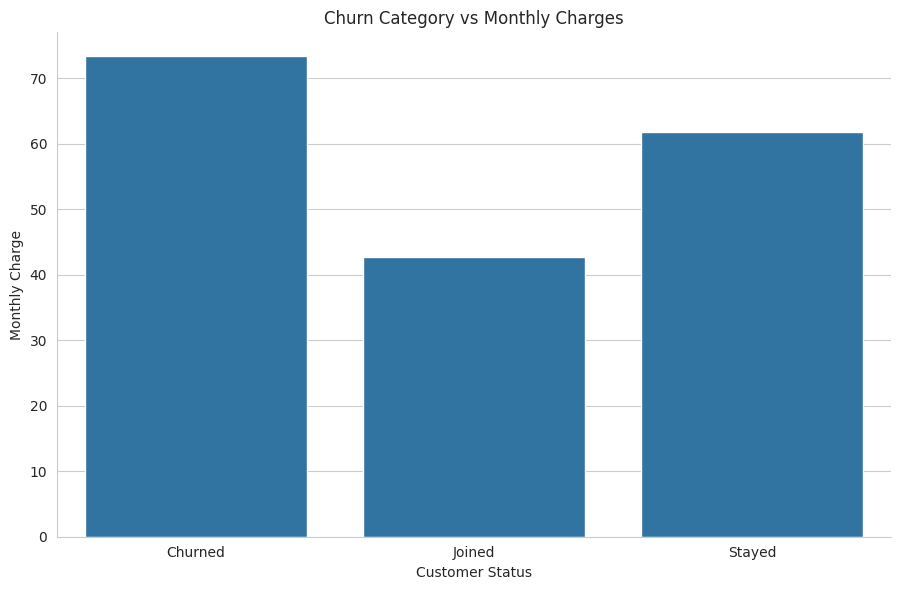

In [24]:
grouped = telecom.groupby('Customer Status')['Monthly Charge'].mean().reset_index()

plt.figure(figsize=(10, 12))
sns.catplot(
    data=grouped,
    x='Customer Status',
    y='Monthly Charge',
    kind='bar',
    height=6,
    aspect=1.5
)
plt.title("Churn Category vs Monthly Charges")
plt.ylabel('Monthly Charge')
plt.xlabel('Customer Status')
plt.tight_layout()
plt.show()

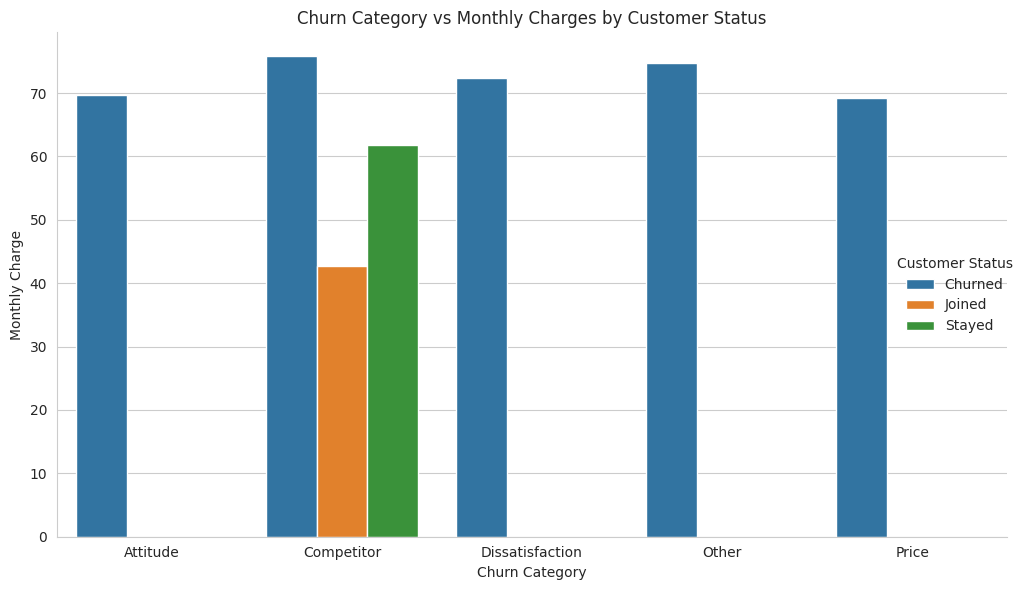

In [22]:
grouped = telecom.groupby(['Churn Category', 'Customer Status'])['Monthly Charge'].mean().reset_index()

# Plot
sns.set_style("whitegrid")
sns.catplot(
    data=grouped,
    x='Churn Category',
    y='Monthly Charge',
    hue='Customer Status',  # differentiate by Customer Status
    kind='bar',
    height=6,
    aspect=1.5
)

plt.title("Churn Category vs Monthly Charges by Customer Status")
plt.ylabel('Monthly Charge')
plt.xlabel('Churn Category')
plt.tight_layout()
plt.show()

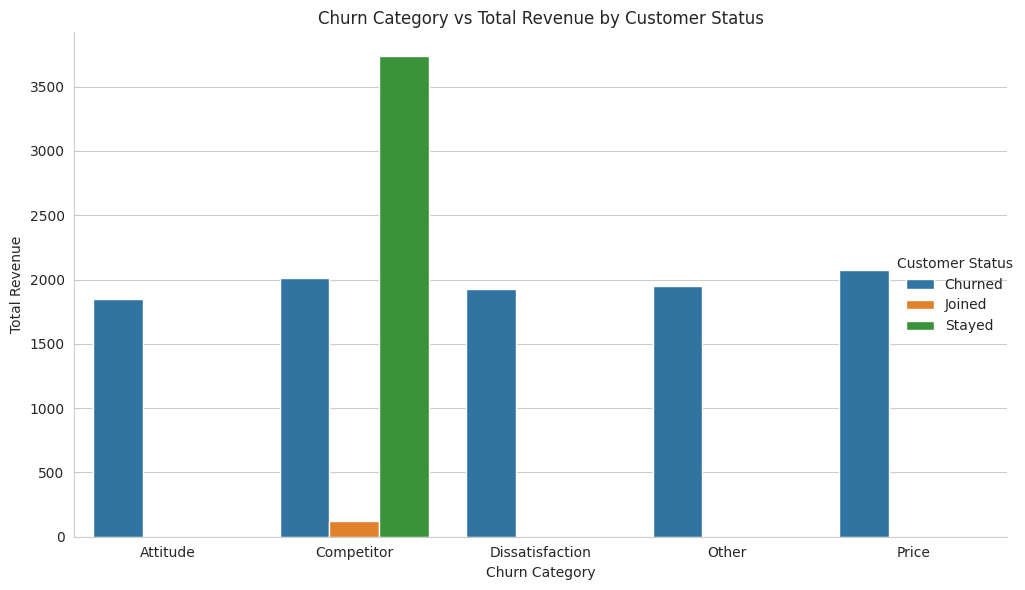

In [23]:
grouped = telecom.groupby(['Churn Category', 'Customer Status'])['Total Revenue'].mean().reset_index()

# Plot
sns.set_style("whitegrid")
sns.catplot(
    data=grouped,
    x='Churn Category',
    y='Total Revenue',
    hue='Customer Status',  # differentiate by Customer Status
    kind='bar',
    height=6,
    aspect=1.5
)

plt.title("Churn Category vs Total Revenue by Customer Status")
plt.ylabel('Total Revenue')
plt.xlabel('Churn Category')
plt.tight_layout()
plt.show()

In [25]:
telecom['Churn Reason'].value_counts()

Churn Reason
Competitor had better devices                5487
Competitor made better offer                  311
Attitude of support person                    220
Don't know                                    130
Competitor offered more data                  117
Competitor offered higher download speeds     100
Attitude of service provider                   94
Price too high                                 78
Product dissatisfaction                        77
Network reliability                            72
Long distance charges                          64
Service dissatisfaction                        63
Moved                                          46
Extra data charges                             39
Limited range of services                      37
Poor expertise of online support               31
Lack of affordable download/upload speed       30
Lack of self-service on Website                29
Poor expertise of phone support                12
Deceased                             

<Figure size 1000x1200 with 0 Axes>

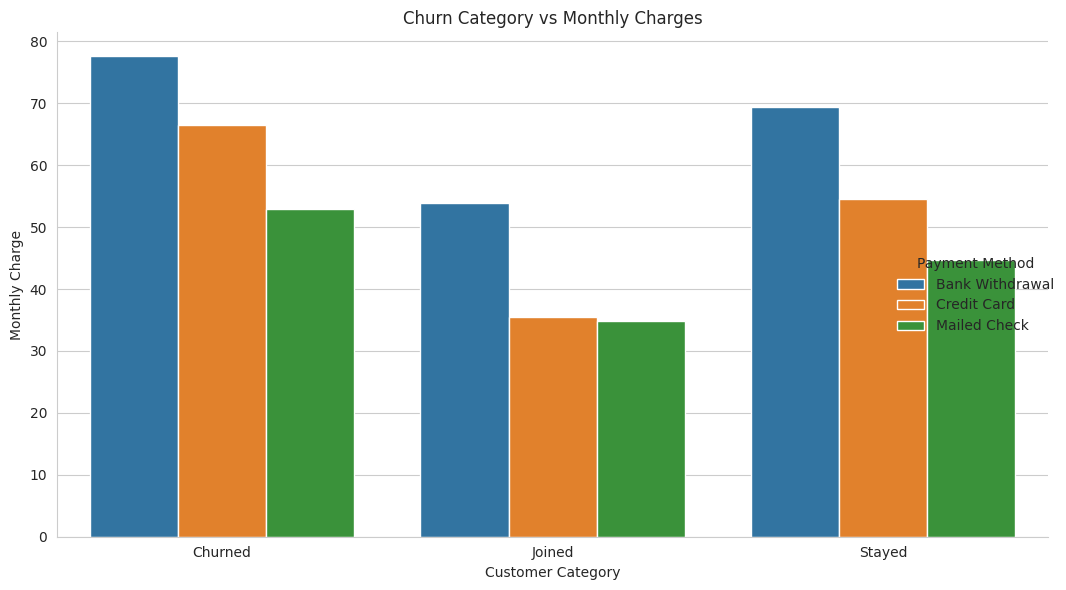

In [27]:
grouped = telecom.groupby(['Customer Status', 'Payment Method'])['Monthly Charge'].mean().reset_index()

plt.figure(figsize=(10, 12))
sns.catplot(
    data=grouped,
    x='Customer Status',
    y='Monthly Charge',
    hue='Payment Method',
    kind='bar',
    height=6,
    aspect=1.5
)
plt.title("Churn Category vs Monthly Charges")
plt.ylabel('Monthly Charge')
plt.xlabel('Customer Category')
plt.tight_layout()
plt.show()

In [28]:
bins = [0, 18, 25, 35, 45, 55, 65, 100]  # adjust according to your data
labels = ['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

telecom['Age Group'] = pd.cut(telecom['Age'], bins=bins, labels=labels, right=False)

telecom['Age Group'].value_counts()

Age Group
35-44    1317
45-54    1286
55-64    1271
25-34    1248
65+      1142
18-24     779
0-17        0
Name: count, dtype: int64

/tmp/ipykernel_5954/2392485176.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = telecom.groupby(['Age Group', 'Customer Status'])['Monthly Charge'].mean().reset_index()


<Figure size 1000x1200 with 0 Axes>

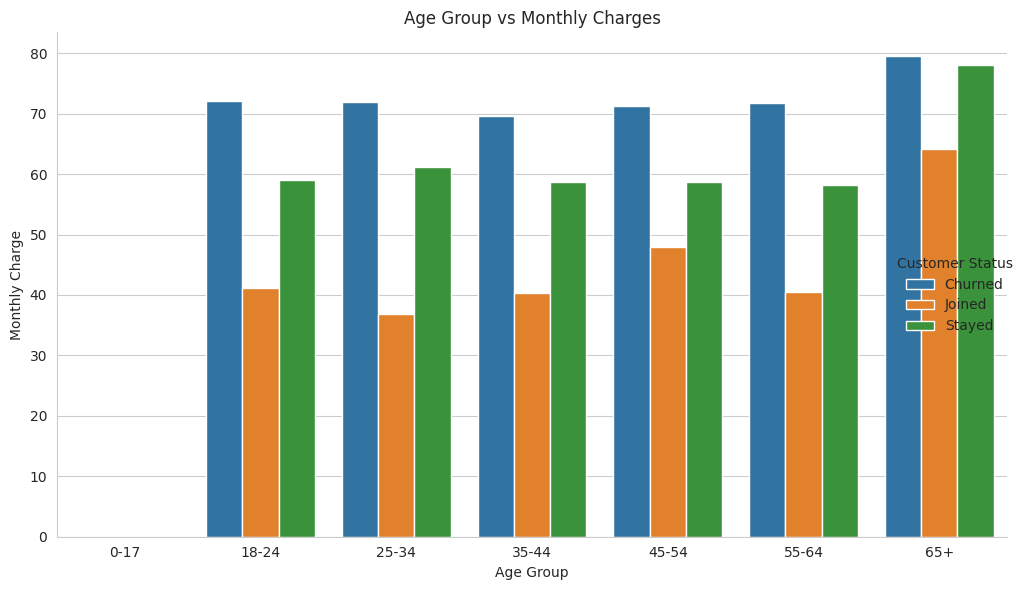

In [29]:
grouped = telecom.groupby(['Age Group', 'Customer Status'])['Monthly Charge'].mean().reset_index()

plt.figure(figsize=(10, 12))
sns.catplot(
    data=grouped,
    x='Age Group',
    y='Monthly Charge',
    hue='Customer Status',
    kind='bar',
    height=6,
    aspect=1.5
)
plt.title("Age Group vs Monthly Charges")
plt.ylabel('Monthly Charge')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()

/tmp/ipykernel_5954/1666772554.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = telecom.groupby(['Customer Status', 'Age Group'])['Monthly Charge'].mean().reset_index()


<Figure size 1000x1200 with 0 Axes>

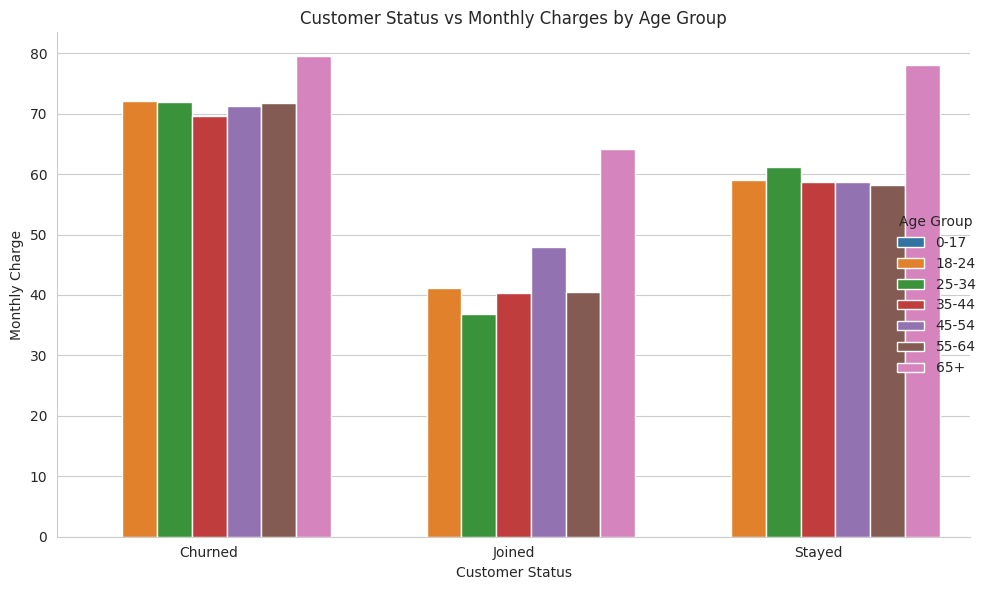

In [33]:
grouped = telecom.groupby(['Customer Status', 'Age Group'])['Monthly Charge'].mean().reset_index()

plt.figure(figsize=(10, 12))
sns.catplot(
    data=grouped,
    x='Customer Status',
    y='Monthly Charge',
    hue='Age Group',
    kind='bar',
    height=6,
    aspect=1.5
)
plt.title("Customer Status vs Monthly Charges by Age Group")
plt.ylabel('Monthly Charge')
plt.xlabel('Customer Status')
plt.tight_layout()
plt.show()

In [30]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Customer ID                        7043 non-null   object  
 1   Gender                             7043 non-null   object  
 2   Age                                7043 non-null   int64   
 3   Married                            7043 non-null   object  
 4   Number of Dependents               7043 non-null   int64   
 5   City                               7043 non-null   object  
 6   Zip Code                           7043 non-null   int64   
 7   Latitude                           7043 non-null   float64 
 8   Longitude                          7043 non-null   float64 
 9   Number of Referrals                7043 non-null   int64   
 10  Tenure in Months                   7043 non-null   int64   
 11  Offer                              7043 non

In [32]:
telecom['Online Backup'].value_counts()

Online Backup
No     4614
Yes    2429
Name: count, dtype: int64